# Simulation for high field OPM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
gamma_0 = 0.159e6 #Hz
gamma_1 = 13.9925e9 #Hz/T
gamma_2 = 0.44e6 #Hz/T²
xi =1+0.92e-6 
B=100e-3

extreme_sigma_positive = gamma_0 + gamma_1*xi*B + gamma_2*xi*xi*B*B
extreme_sigma_negative = gamma_0 - gamma_1*xi*B + gamma_2*xi*xi*B*B
print('$\sigma_+$ for 100mT field : {:.3e}'.format(extreme_sigma_positive))
print('$\sigma_-$ for 100mT field : {:.3e}'.format(extreme_sigma_negative))

$\sigma_+$ for 100mT field : 1.399e+09
$\sigma_-$ for 100mT field : -1.399e+09


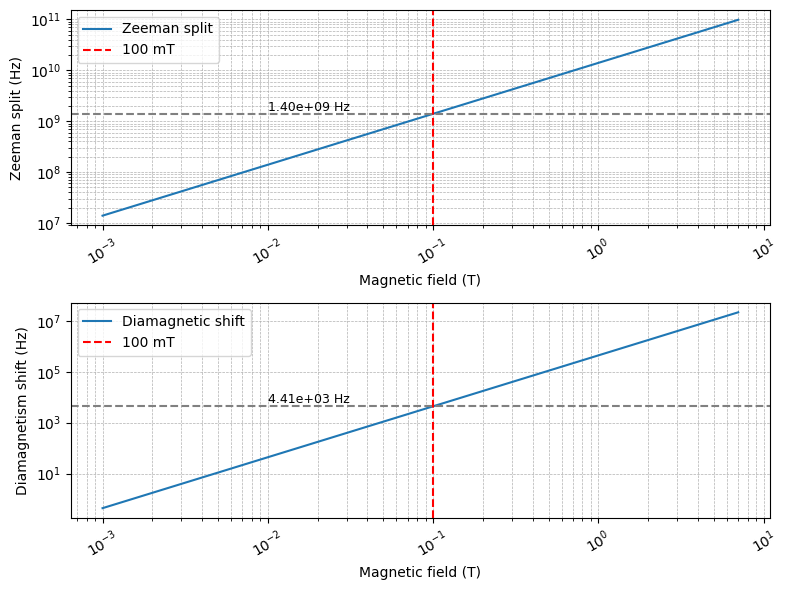

In [34]:
B_list = np.logspace(np.log10(1e-3), np.log10(7), 2000)
diamagnetic_part = gamma_2*xi*xi*B_list**2
Zeeman_part = gamma_1*xi*B_list

B_target = 0.1
idx = np.argmin(np.abs(B_list - B_target))
zeeman_val = Zeeman_part[idx]
dia_val = diamagnetic_part[idx]

fig,axes = plt.subplots(nrows=2,ncols=1, figsize=(8,6))

axes[0].plot(B_list,Zeeman_part, label='Zeeman split')
axes[0].axvline(x=B_target, color='red', linestyle='--', label='100 mT')
axes[0].axhline(y=zeeman_val, color='gray', linestyle='--')
axes[0].text(B_target*0.1, zeeman_val, f'{zeeman_val:.2e} Hz',
             va='bottom', ha='left', color='black', fontsize=9)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel('Magnetic field (T)')
axes[0].tick_params(axis='x', labelrotation=30)
axes[0].set_ylabel('Zeeman split (Hz)')
axes[0].legend()
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)


axes[1].plot(B_list,diamagnetic_part, label='Diamagnetic shift')
axes[1].axvline(x=B_target, color='red', linestyle='--', label='100 mT')
axes[1].text(B_target*0.1, dia_val, f'{dia_val:.2e} Hz',
             va='bottom', ha='left', color='black', fontsize=9)
axes[1].axhline(y=dia_val, color='gray', linestyle='--')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Magnetic field (T)')
axes[1].tick_params(axis='x', labelrotation=30)
axes[1].set_ylabel('Diamagnetism shift (Hz)')
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()

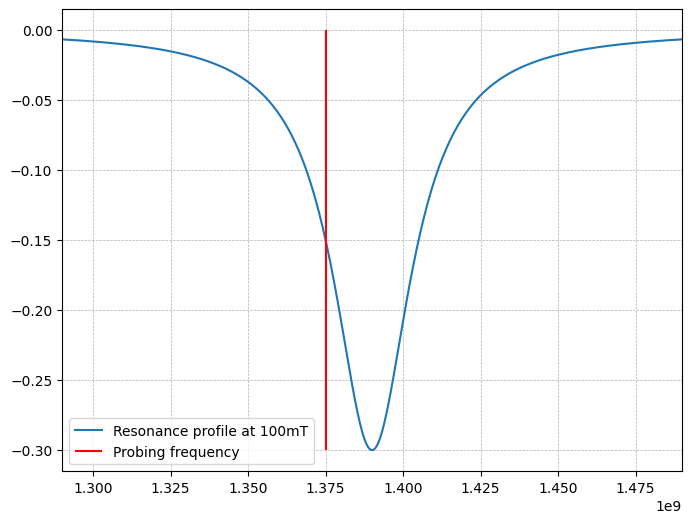

In [33]:

def double_lorentzian(f, delta=1.39e9, gamma=30e6, contrast=0.30):
    f = np.asarray(f)
    half_width = gamma / 2.0

    # Single‐peak Lorentzians
    L_plus  = (half_width**2) / ((f - delta)**2 + half_width**2)
    L_minus = (half_width**2) / ((f + delta)**2 + half_width**2)

    # Combined and scaled by contrast
    return -contrast * (L_plus + L_minus)

freqs = np.linspace(-2e9, 2e9, 10001)

L = double_lorentzian(freqs)

S = 1.0 - L

plt.figure(figsize=(8,6))
plt.plot(freqs,L, label='Resonance profile at 100mT')
plt.vlines(x=1.375e9,ymin=-0.3,ymax=0, colors='r', label='Probing frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim([1.39e9-0.1e9,1.39e9+0.1e9])
plt.legend()
plt.show()

In [35]:
gamma_H = 42.577478461e6 #Hz/T

B*gamma_H

4257747.846100001